In [1]:
%matplotlib inline
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from scipy.stats import linregress
# Import the requests library
import requests
# Import the API key
from config import weather_api_key
from configure import g_key
# Import datetime module from datetime library
from datetime import datetime

In [2]:
# Create a set of random latitudes and longtitudes combinations
lats=np.random.uniform(-90, 90, size=1500)
lngs= np.random.uniform(-180, 180, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [3]:
# Create a list for holding the cities
cities=[]
# Identify the nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city= citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If city is unique, add city to the cities list
    if city not in cities:
        cities.append(city)
    
# Print city count
len(cities) 

610

In [4]:
# Starting the URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da47acd65d1fcf05dbeb697bf2210c1


In [5]:
# Create an empty list to hold the weather data
city_data=[]

# Print the beginning of the logging
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters
record_count=1
set_count=1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all of the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50==0 and i >= 50):
        set_count +=1
        record_count =1
        
    # Create endpoint URL with each city
    city_url = url+'&q='+ city
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count+=1
    
    # Run API request for each city 
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
    # If an error is experienced, skip the city
    except:
        print('City not found. Skipping '+ city)
        pass
# Indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | jiddah
City not found. Skipping jiddah
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | san jeronimo
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | pochutla
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | namibe
Processing Record 15 of Set 1 | richards bay
Processing Record 16 of Set 1 | ambilobe
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | ambikapur
Processing Record 19 of Set 1 | jizan
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping illoqqortoormiut
Processing Record 22 of Set 1 | ushuaia
Processing Record 2

Processing Record 33 of Set 4 | barbar
City not found. Skipping barbar
Processing Record 34 of Set 4 | mangai
Processing Record 35 of Set 4 | marsh harbour
Processing Record 36 of Set 4 | mount gambier
Processing Record 37 of Set 4 | hamilton
Processing Record 38 of Set 4 | firozpur
Processing Record 39 of Set 4 | liusha
Processing Record 40 of Set 4 | nemuro
Processing Record 41 of Set 4 | mrirt
City not found. Skipping mrirt
Processing Record 42 of Set 4 | cayenne
Processing Record 43 of Set 4 | hvide sande
Processing Record 44 of Set 4 | touros
Processing Record 45 of Set 4 | pauini
Processing Record 46 of Set 4 | mar del plata
Processing Record 47 of Set 4 | moron
Processing Record 48 of Set 4 | dawei
Processing Record 49 of Set 4 | falkenberg
Processing Record 50 of Set 4 | bukama
Processing Record 1 of Set 5 | listvyanskiy
Processing Record 2 of Set 5 | shetpe
Processing Record 3 of Set 5 | pryazha
Processing Record 4 of Set 5 | yar-sale
Processing Record 5 of Set 5 | la rioja
Pr

Processing Record 13 of Set 8 | alcanena
Processing Record 14 of Set 8 | falaleu
City not found. Skipping falaleu
Processing Record 15 of Set 8 | champerico
Processing Record 16 of Set 8 | amot
Processing Record 17 of Set 8 | beruni
City not found. Skipping beruni
Processing Record 18 of Set 8 | suileng
Processing Record 19 of Set 8 | banda aceh
Processing Record 20 of Set 8 | thinadhoo
Processing Record 21 of Set 8 | faya
Processing Record 22 of Set 8 | hunza
City not found. Skipping hunza
Processing Record 23 of Set 8 | jiangyou
Processing Record 24 of Set 8 | sistranda
Processing Record 25 of Set 8 | waddan
Processing Record 26 of Set 8 | maroantsetra
Processing Record 27 of Set 8 | kadi
Processing Record 28 of Set 8 | dudinka
Processing Record 29 of Set 8 | drummondville
Processing Record 30 of Set 8 | rognan
Processing Record 31 of Set 8 | lumphat
Processing Record 32 of Set 8 | bambanglipuro
Processing Record 33 of Set 8 | alofi
Processing Record 34 of Set 8 | varhaug
Processing 

Processing Record 41 of Set 11 | la gomera
Processing Record 42 of Set 11 | inhambane
Processing Record 43 of Set 11 | dunmore town
Processing Record 44 of Set 11 | goderich
Processing Record 45 of Set 11 | marfino
Processing Record 46 of Set 11 | kavieng
Processing Record 47 of Set 11 | hangu
Processing Record 48 of Set 11 | saint-georges
Processing Record 49 of Set 11 | neiva
Processing Record 50 of Set 11 | gulbene
Processing Record 1 of Set 12 | camacha
Processing Record 2 of Set 12 | mehamn
Processing Record 3 of Set 12 | igarka
Processing Record 4 of Set 12 | knysna
Processing Record 5 of Set 12 | pacific grove
Processing Record 6 of Set 12 | muscat
Processing Record 7 of Set 12 | nouadhibou
Processing Record 8 of Set 12 | temerin
Processing Record 9 of Set 12 | kieta
Processing Record 10 of Set 12 | novikovo
Processing Record 11 of Set 12 | aden
Processing Record 12 of Set 12 | krasnyy chikoy
Processing Record 13 of Set 12 | honningsvag
Processing Record 14 of Set 12 | guirating

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,78.80,65,75,8.05,US,2019-11-08 04:55:03
1,Vaini,15.34,74.49,75.20,78,40,0.76,IN,2019-11-08 04:55:03
2,San Jeronimo,-13.65,-73.37,49.37,90,84,2.73,PE,2019-11-08 04:55:03
3,Cape Town,-33.93,18.42,59.00,67,4,18.34,ZA,2019-11-08 04:52:40
4,Hithadhoo,-0.60,73.08,82.47,68,0,6.20,MV,2019-11-08 04:55:03


In [8]:
# Reorder the columns
city_data_df = city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2019-11-08 04:55:03,22.08,-159.32,78.80,65,75,8.05
1,Vaini,IN,2019-11-08 04:55:03,15.34,74.49,75.20,78,40,0.76
2,San Jeronimo,PE,2019-11-08 04:55:03,-13.65,-73.37,49.37,90,84,2.73
3,Cape Town,ZA,2019-11-08 04:52:40,-33.93,18.42,59.00,67,4,18.34
4,Hithadhoo,MV,2019-11-08 04:55:03,-0.60,73.08,82.47,68,0,6.20


In [9]:
len(city_data_df)

535

In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Scatter plot for different lat different temp

In [12]:
# Extract relevant fieldd from the DataFrame
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [13]:
# Import the time module
import time
# get today's date in seconds
today = time.strftime('%x')
today

'11/07/19'

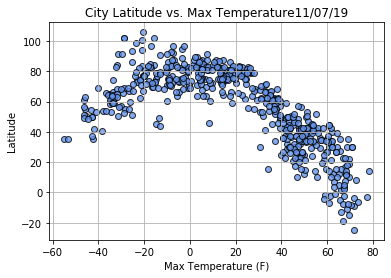

In [14]:
# Build the scatter plot for latitude vs. max temperaturr
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o", color='cornflowerblue',
            alpha=.8, label="Cities")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature'+ time.strftime('%x'))
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data\Fig1.png')

plt.show()

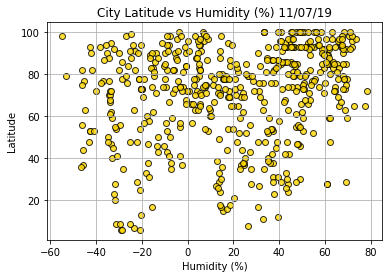

In [15]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, marker='o', color='gold', edgecolor='black', linewidths=1, alpha=.8, label='Cities')
# Incorporate other graph properties
plt.title(f'City Latitude vs Humidity (%) ' +time.strftime('%x'))
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig('weather_data\Fig2.png')
plt.show()

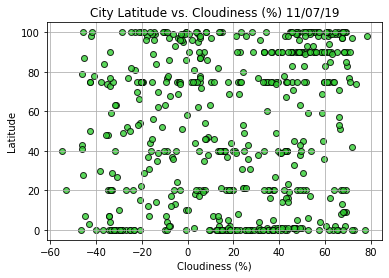

In [16]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter( lats, cloudiness, marker='o', color='limegreen', edgecolor='black', linewidths=1, alpha=.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) '+ time.strftime('%x'))
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')
plt.show()

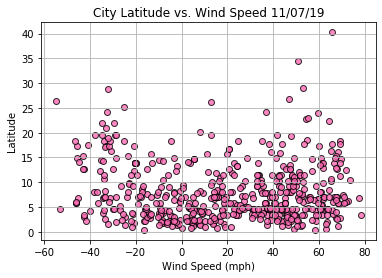

In [17]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter( lats, wind_speed, marker='o', color='hotpink', edgecolor='black', linewidths=1, alpha=.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                 Richards Bay
Country                        ZA
Date          2019-11-08 04:55:05
Lat                        -28.77
Lng                         32.06
Max Temp                    69.03
Humidity                       78
Cloudiness                    100
Wind Speed                  14.92
Name: 13, dtype: object

In [20]:
# Create Northern and Southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <0)]

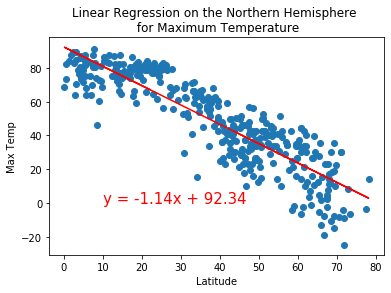

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,0))

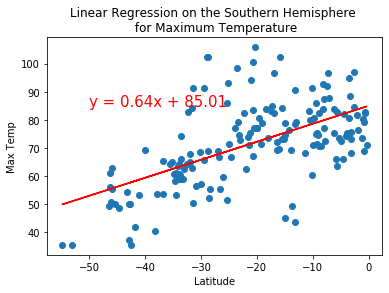

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85))

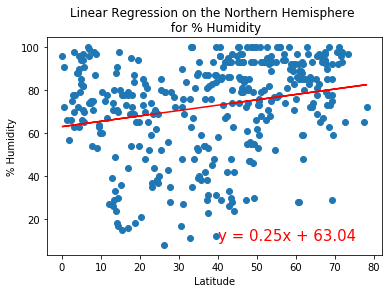

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

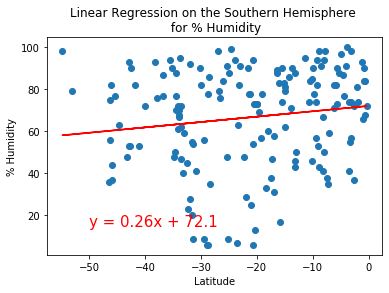

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

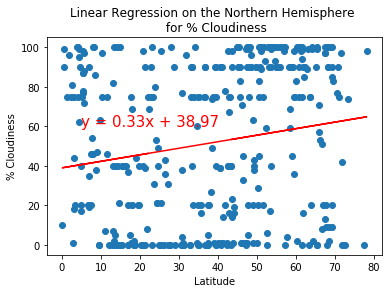

In [25]:
# Linear regression on the NOrthern Hemisphere cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (5,60))

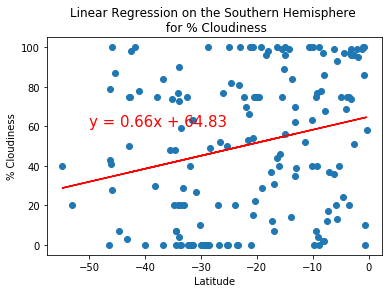

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

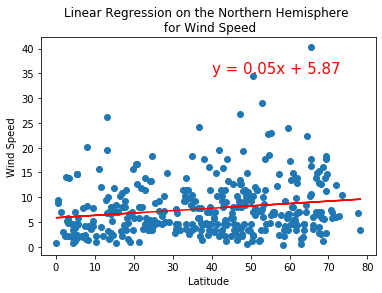

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

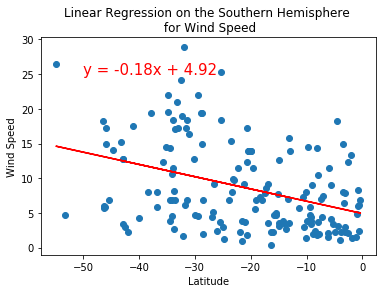

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))

In [29]:
# Create heatmaps

In [30]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from configure import g_key